# Video games data Analysis and Model training

# Data CLeaning

### data showing


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Decribing the data


In [11]:
df.describe()
# tells that the data range from 1980 to 2020

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


### info of columns and there data types


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


### Finding and Removing Null values if any.


In [15]:
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

### Removing rows with missing values


In [17]:
indexes = df[df.isnull().sum(axis = 1) > 0].index

In [18]:
df.drop(index=indexes, inplace = True)

In [19]:
# Now we have no null values


In [20]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [21]:
# Checkh for duplicates value
df.duplicated().sum()

0

# Data Analysis and Visualization

## Data Exploration

###  Number of games


In [25]:
len(df['Name'])
# as there are no null entries so the number of names are number of games

16416

### Columns and types


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


##  Sales Trends

### Global sales trend over time


In [30]:
# sorting data according to date from 1980 to 2020
df = df.sort_values(by=['Year_of_Release']).reset_index(drop=True)


In [31]:
yearly_sales = df.groupby(['Year_of_Release'])['Global_Sales'].sum()

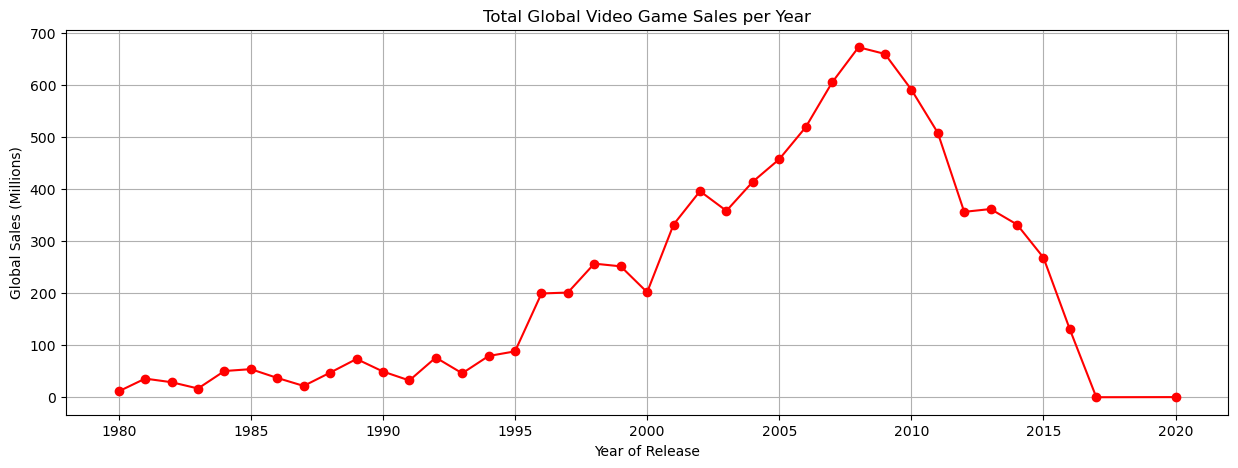

In [32]:
plt.figure(figsize=(15,5))
plt.plot(yearly_sales.index, yearly_sales.values, color = 'red', marker = 'o')
#sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, color = 'red', marker='o')
plt.title('Total Global Video Game Sales per Year')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.show()


## Top-Selling Games & Publishers

### Top ten best selling games Globaly


In [35]:
top_publishers = df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).head(10)

In [36]:
top_publishers

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Name: Global_Sales, dtype: float64

### Highest global sales publisher


In [38]:
df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).head(1)

Publisher
Nintendo    1786.72
Name: Global_Sales, dtype: float64

### Bar plot for top 10 games


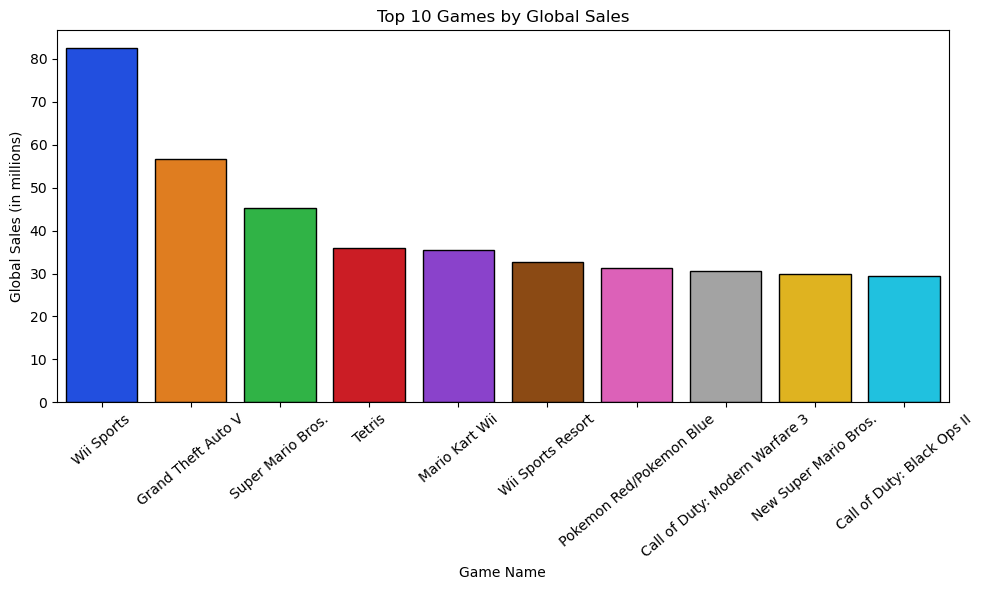

In [40]:
top10 = df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.index,y= top10.values, palette='bright',hue = top10.index, legend = False, edgecolor = 'black')

plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Games by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


### Bar plot for top 10 publisher


In [42]:
top10_publisher = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10_publisher

Publisher
Nintendo                        1786.72
Electronic Arts                 1100.05
Activision                       725.14
Sony Computer Entertainment      606.27
Ubisoft                          470.45
Take-Two Interactive             403.58
THQ                              338.11
Konami Digital Entertainment     277.36
Sega                             268.11
Namco Bandai Games               254.19
Name: Global_Sales, dtype: float64

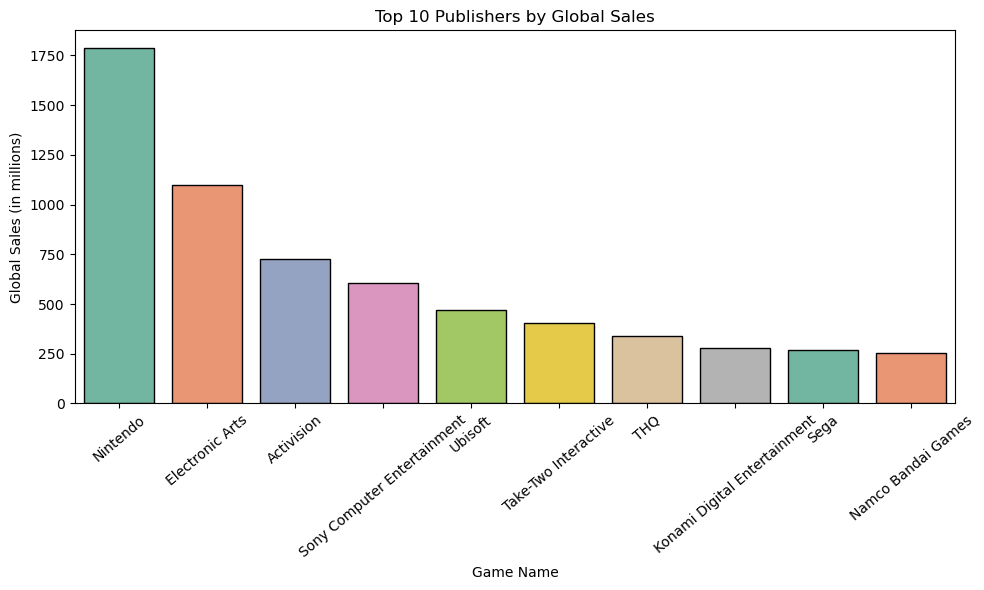

In [130]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_publisher.index, y=top10_publisher.values, palette = 'Set2', edgecolor='black', hue=top10_publisher.index)

plt.xlabel('Game Name')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Publishers by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


## Regional Popularity

### Popular game in NA 


In [46]:
df.groupby(['Name'])['NA_Sales'].sum().sort_values(ascending = False).head()

Name
Wii Sports            41.36
Super Mario Bros.     32.48
Duck Hunt             26.93
Tetris                26.17
Grand Theft Auto V    23.84
Name: NA_Sales, dtype: float64

### Popular games in EU


In [48]:
df.groupby(['Name'])['EU_Sales'].sum().sort_values(ascending = False).head()

Name
Wii Sports                        28.96
Grand Theft Auto V                23.42
Mario Kart Wii                    12.76
FIFA 15                           12.02
Call of Duty: Modern Warfare 3    11.15
Name: EU_Sales, dtype: float64

### Popular games in JP


In [50]:
df.groupby(['Name'])['JP_Sales'].sum().sort_values(ascending = False).head()

Name
Pokemon Red/Pokemon Blue         10.22
Pokemon Gold/Pokemon Silver       7.20
Super Mario Bros.                 6.96
New Super Mario Bros.             6.50
Pokemon Diamond/Pokemon Pearl     6.04
Name: JP_Sales, dtype: float64

### Top 5 global games reginol comparision of sales


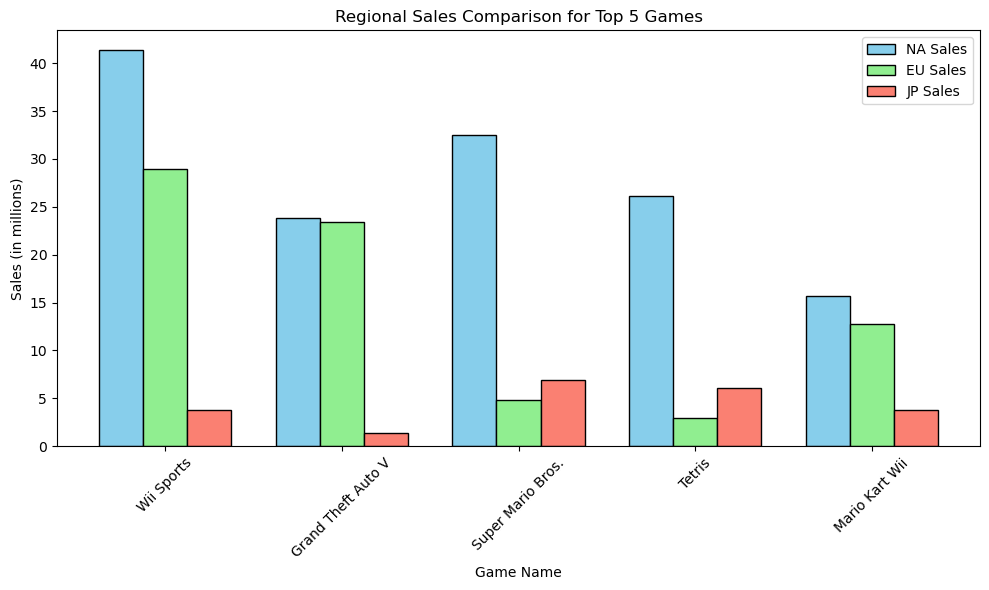

In [52]:
sales = df.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum()
top5 = sales.sort_values(by='Global_Sales', ascending=False).head()

labels = top5.index.tolist()
na_sales = top5['NA_Sales'].values
eu_sales = top5['EU_Sales'].values
jp_sales = top5['JP_Sales'].values

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, na_sales, width, label='NA Sales', color='skyblue', edgecolor = 'black')
plt.bar(x, eu_sales, width, label='EU Sales', color='lightgreen', edgecolor = 'black')
plt.bar(x + width, jp_sales, width, label='JP Sales', color='salmon', edgecolor = 'black')

# Labels and formatting
plt.xlabel('Game Name')
plt.ylabel('Sales (in millions)')
plt.title('Regional Sales Comparison for Top 5 Games')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Gnere which produce the most global sales


In [54]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending = False).head(1)
# action with 1717.62 millions

Genre
Action    1717.62
Name: Global_Sales, dtype: float64

### Bar Chart of Global sales according to genre

In [56]:
genre = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending = False)

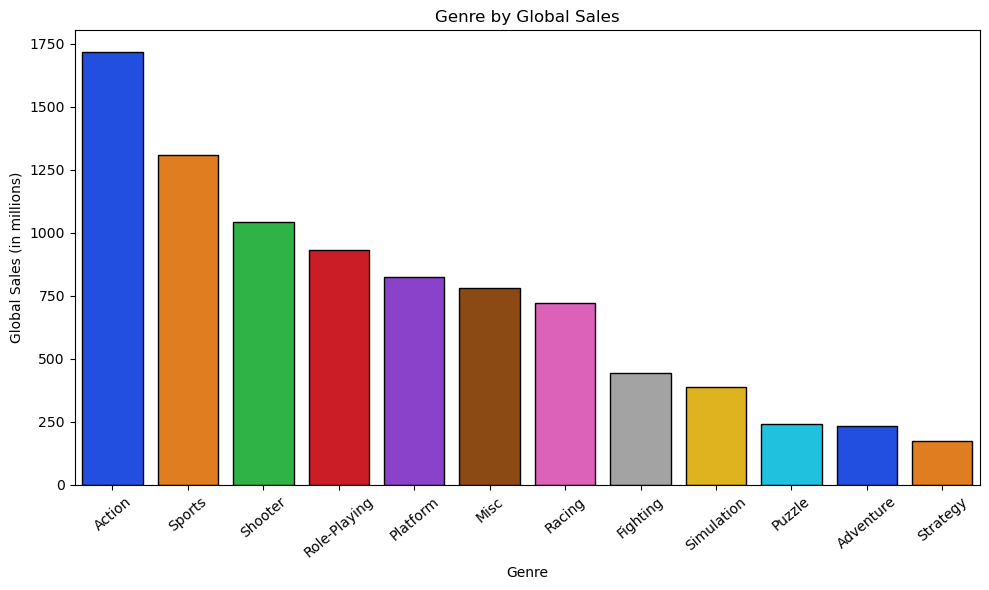

In [57]:
plt.figure(figsize=(10,6))
#plt.bar(genre.index, genre.values, color='salmon', edgecolor='black')
sns.barplot(x=genre.index, y=genre.values, hue = genre.index,palette = 'bright', edgecolor='black')

plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Genre by Global Sales')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

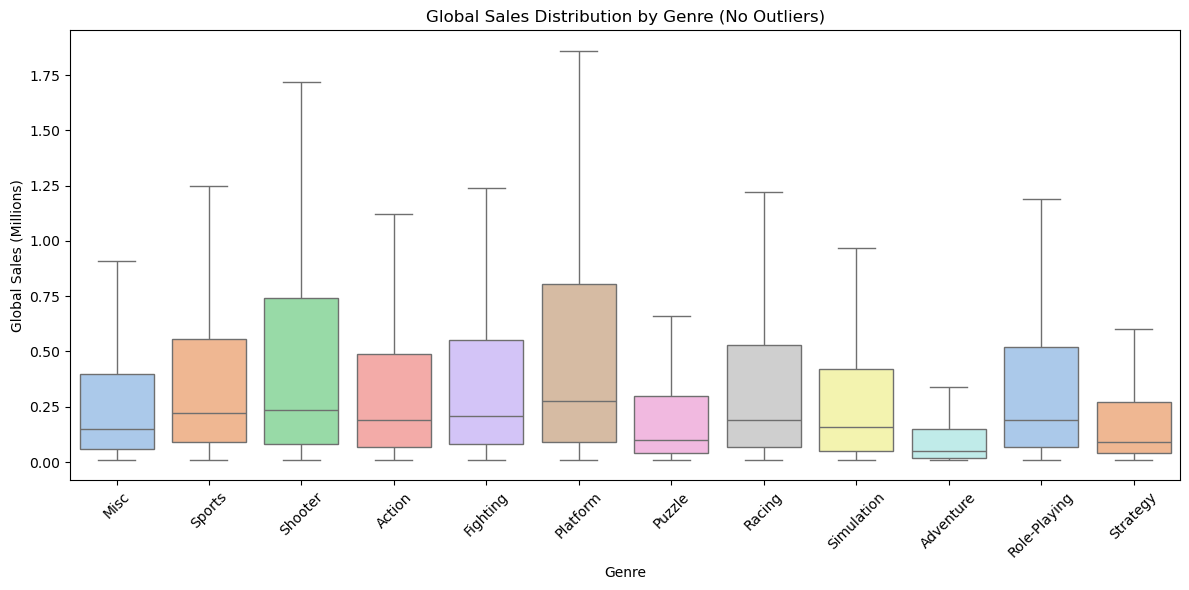

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Genre", y="Global_Sales", palette="pastel", showfliers=False, hue="Genre")
plt.title("Global Sales Distribution by Genre (No Outliers)")
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Platorm Comparisons by Global sales

In [59]:
top_platforms = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending = False).head(10)

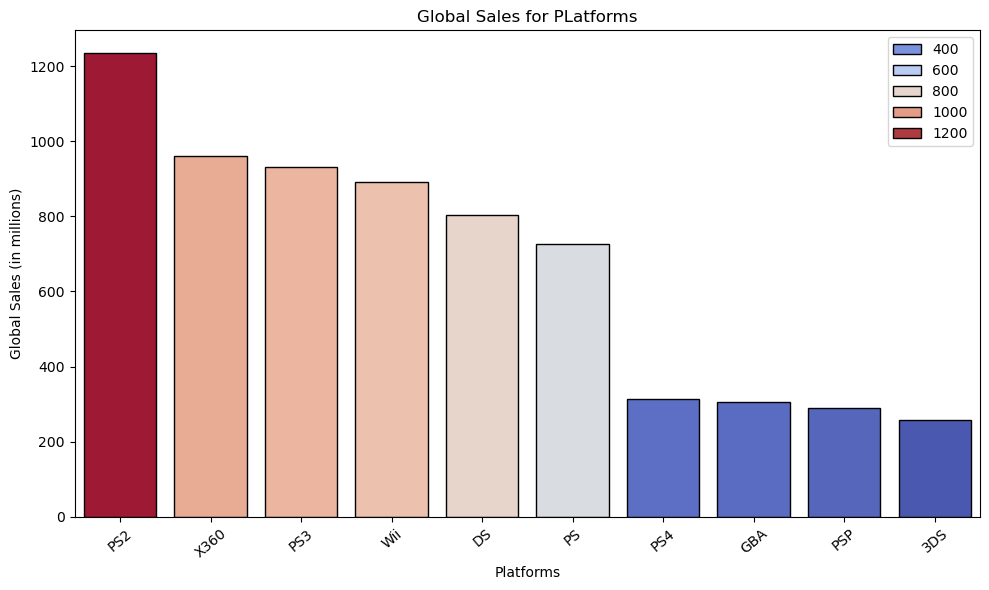

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_platforms.index, y=top_platforms.values, hue = top_platforms.values, palette = 'coolwarm' , edgecolor = 'black')

plt.xlabel('Platforms')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales for PLatforms')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

### Platform sales in country each


In [62]:
df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending = False).head(10)

Platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
DS      188.41
PS4     141.09
PC      140.08
GBA      72.49
PSP      65.62
Name: EU_Sales, dtype: float64

In [63]:
df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending = False).head(10)

Platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
NES      98.65
GB       85.12
PS3      79.41
PSP      75.88
Wii      68.28
Name: JP_Sales, dtype: float64

In [64]:
df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending = False).head(10)

Platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.58
PS      334.72
XB      182.06
GBA     178.43
N64     138.91
GC      131.94
Name: NA_Sales, dtype: float64

## Total sales per region


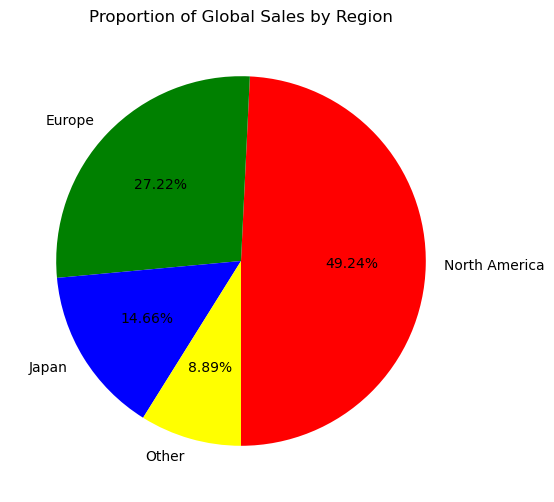

In [180]:
region_sales = [
    df['NA_Sales'].sum(),
    df['EU_Sales'].sum(),
    df['JP_Sales'].sum(),
    df['Other_Sales'].sum()
]

labels = ['North America', 'Europe', 'Japan', 'Other']
colors =['Red','Green','Blue','Yellow','Magenta','AntiqueWhite']

plt.figure(figsize=(7, 6))
plt.pie(region_sales, labels=labels, colors=colors, startangle=270,autopct='%0.2f%%')
plt.title('Proportion of Global Sales by Region')
plt.show()


## Sales comparison per region throught out years


In [68]:
yearly_sales_NA = df.groupby(['Year_of_Release'])['NA_Sales'].sum()
yearly_sales_EU = df.groupby(['Year_of_Release'])['EU_Sales'].sum()
yearly_sales_JP = df.groupby(['Year_of_Release'])['JP_Sales'].sum()
yearly_sales_Others = df.groupby(['Year_of_Release'])['Other_Sales'].sum()

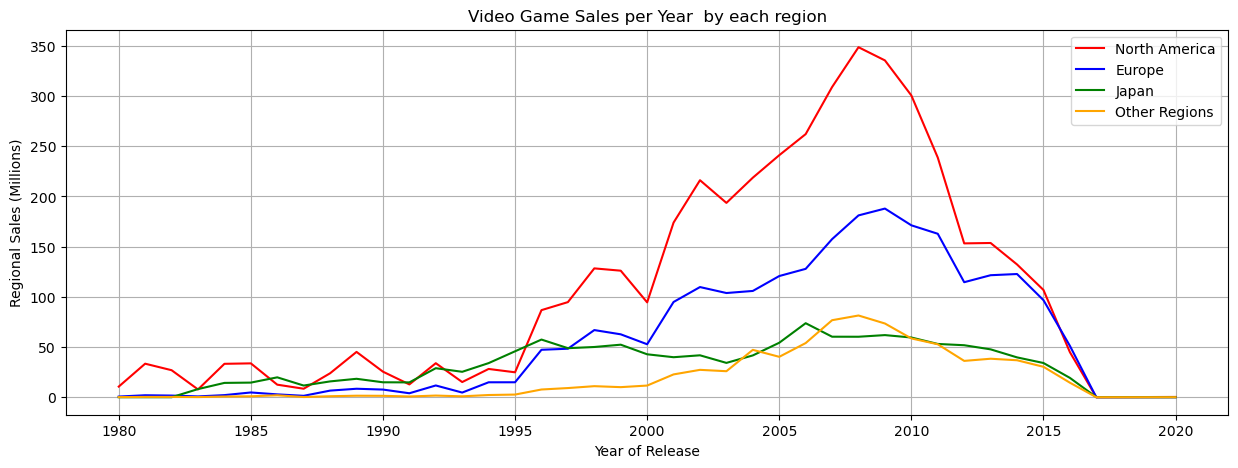

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
#north america
plt.plot(yearly_sales_NA.index, yearly_sales_NA.values, color = 'red', label='North America')
# europe
plt.plot(yearly_sales_EU.index, yearly_sales_EU.values, color = 'blue',label='Europe')
# japan
plt.plot(yearly_sales_JP.index, yearly_sales_JP.values, color = 'green', label='Japan')

plt.plot(yearly_sales_Others.index, yearly_sales_Others.values, color = 'orange', label='Other Regions')

plt.legend()
plt.title('Video Game Sales per Year  by each region')
plt.xlabel('Year of Release')
plt.ylabel('Regional Sales (Millions)')
plt.grid(True)
plt.show()


## Corelation of data frame


In [71]:
df_num =  df.select_dtypes(include=['number'])
df_num.drop(columns=['Year_of_Release'], inplace = True)

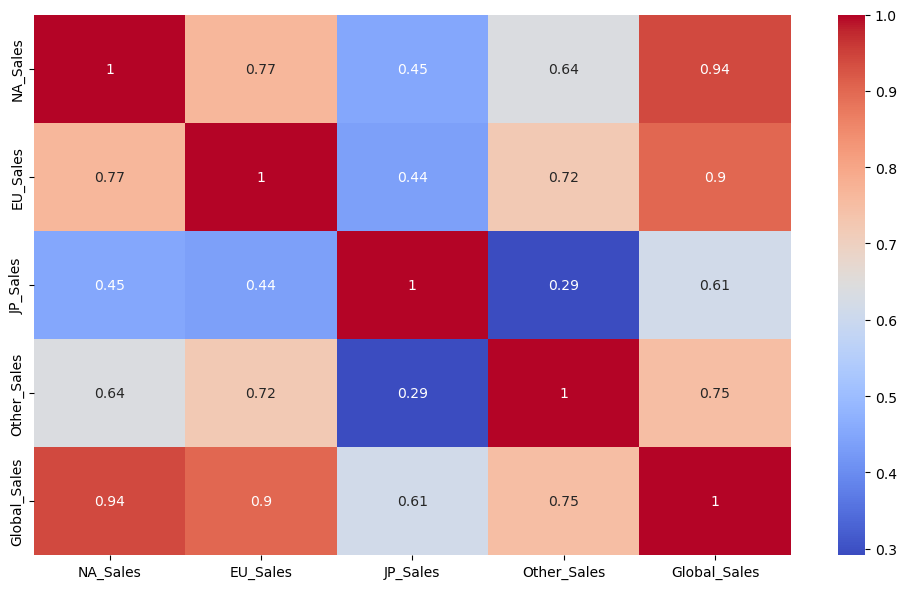

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()

# Model Training

## KNN Model to predict the genre

In [75]:
df2= df.copy()

In [225]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [279]:
# normalizing the data and also it will convert non numerical data into numerical data
label_encoders = {}
for col in df2.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])

    label_encoders[col] = le

In [291]:
X = df2.drop(columns=['Genre','Year_of_Release'])
Y = df2['Genre']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=20)
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test)*100)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f} ')

55.572472594397084
Accuracy: 0.56 


## Linear Regression model to Predict ht Global Sales

In [80]:
from sklearn.linear_model import LinearRegression

In [257]:
reg = LinearRegression()
X= df2.drop(columns=['Global_Sales','Name','Year_of_Release'])
Y = df2['Global_Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
reg.fit(X_train, Y_train)

LinearRegression()

In [259]:
reg.score(X_test, Y_test)

0.9999875876611893

# THe End